<a href="https://colab.research.google.com/github/arooshasolomon/DS-4002/blob/main/CS3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [23]:
import kagglehub
import pandas as pd

# Download dataset
path = kagglehub.dataset_download("everydaycodings/global-news-dataset")

# Load CSV file (adjust path as needed)
news_df = pd.read_csv(path + "/data.csv")


# Drop rows where 'content' is NaN
news_df = news_df.dropna(subset=['content'])


print(news_df.shape)
print(news_df.head())

   article_id source_id                   source_name  \
0       89541       NaN  International Business Times   
1       89542       NaN                    Prtimes.jp   
2       89543       NaN                      VOA News   
3       89545       NaN            The Indian Express   
4       89547       NaN           The Times of Israel   

                                       author  \
0                              Paavan MATHEMA   
1                                         NaN   
2  webdesk@voanews.com (Agence France-Presse)   
3                                   Editorial   
4                                 Jacob Magid   

                                               title  \
0  UN Chief Urges World To 'Stop The Madness' Of ...   
1              RANDEBOOよりワンランク上の大人っぽさが漂うニットとベストが新登場。   
2  UN Chief Urges World to 'Stop the Madness' of ...   
3  Sikkim warning: Hydroelectricity push must be ...   
4  200 foreigners, dual nationals cut down in Ham...   

                         

In [6]:
!pip install vaderSentiment

from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

# Initialize
analyzer = SentimentIntensityAnalyzer()


def get_sentiment(text):
    score = analyzer.polarity_scores(text)
    return score['compound']  # value between -1 (very negative) and +1 (very positive)

# Create a new column for sentiment
news_df['sentiment'] = news_df['content'].apply(get_sentiment)

# Quick look
print(news_df[['content', 'sentiment']].head())


                                             content  sentiment
0  UN Secretary-General Antonio Guterres urged th...    -0.7845
1  RANDEBOO2023718()WEB2023 Autumn Winter \n"Nepa...     0.0000
2  Kathmandu, Nepal  UN Secretary-General Antonio...    -0.7845
3  At least 14 persons lost their lives and more ...    -0.5423
4  Scores of foreign citizens were killed, taken ...    -0.9286


This will allow us to visualize the words in the sentiment analysis that are negative

          word  sentiment
7       danger    -0.5267
12       crime    -0.5423
16  struggling    -0.4215


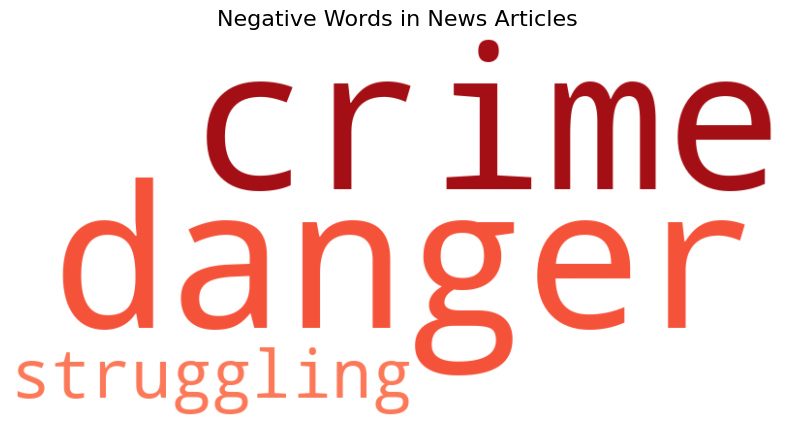

In [20]:
import pandas as pd
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
import re
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Set up the VADER Sentiment Analyzer
analyzer = SentimentIntensityAnalyzer()

# common stopwords
stopwords = {'the', 'and', 'of', 'to', 'a', 'in', 'on', 'for', 'with', 'at', 'by', 'an'}

# Function to get sentiment for each word in an article
def get_word_sentiment(text):
    # Tokenize the text into words using regular expressions
    words = re.findall(r'\b\w+\b', text.lower())

    # Remove stopwords
    words = [word for word in words if word not in stopwords]

    # Get sentiment for each word
    word_sentiments = []
    for word in words:
        sentiment = analyzer.polarity_scores(word)['compound']  # Get sentiment of the word
        word_sentiments.append((word, sentiment))

    return word_sentiments



# Example DataFrame structure
data = {'content': [
    "The economy is doing great, but the environment is in danger.",
    "There is a rise in global crime, and many countries are struggling.",
    "New technology innovations are improving healthcare every day."
]}

news_df = pd.DataFrame(data)

# Apply to each article in the dataframe
news_df['word_sentiments'] = news_df['content'].apply(get_word_sentiment)

# Flatten the list to get all words and their sentiments
word_list = [word for sublist in news_df['word_sentiments'] for word in sublist]

# Create a DataFrame from the word sentiment list
word_df = pd.DataFrame(word_list, columns=['word', 'sentiment'])

# Filter for negative words (sentiment < -0.05)
negative_words = word_df[word_df['sentiment'] <= -0.05]

# Quick check of negative words
print(negative_words.head())

# Generate a word cloud from the negative words
negative_text = ' '.join(negative_words['word'])

# Generate the word cloud
wordcloud = WordCloud(
    width=800,
    height=400,
    background_color='white',
    colormap='Reds'
).generate(negative_text)

# Plot
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("Negative Words in News Articles", fontsize=16)
plt.show()


Now we will vusialuze the positive words

         word  sentiment
3       great     0.6249
21  improving     0.4215


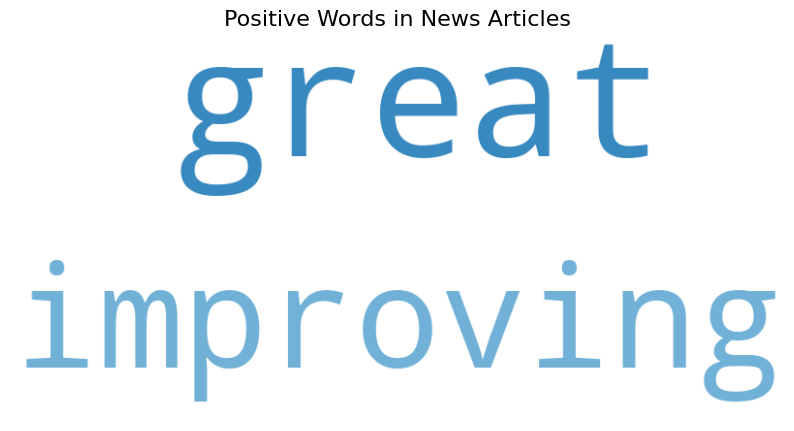

In [24]:
import pandas as pd
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
import re
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Set up the VADER Sentiment Analyzer
analyzer = SentimentIntensityAnalyzer()

# Simple list of common stopwords (you can expand this list if needed)
stopwords = {'the', 'and', 'of', 'to', 'a', 'in', 'on', 'for', 'with', 'at', 'by', 'an'}

# Function to get sentiment for each word in an article
def get_word_sentiment(text):
    # Tokenize the text into words using regular expressions
    words = re.findall(r'\b\w+\b', text.lower())

    # Remove stopwords
    words = [word for word in words if word not in stopwords]

    # Get sentiment for each word
    word_sentiments = []
    for word in words:
        sentiment = analyzer.polarity_scores(word)['compound']  # Get sentiment of the word
        word_sentiments.append((word, sentiment))

    return word_sentiments

# Example DataFrame structure (Replace with your actual dataset)
data = {'content': [
    "The economy is doing great, but the environment is in danger.",
    "There is a rise in global crime, and many countries are struggling.",
    "New technology innovations are improving healthcare every day."
]}

news_df = pd.DataFrame(data)

# Apply to each article in the dataframe
news_df['word_sentiments'] = news_df['content'].apply(get_word_sentiment)

# Flatten the list to get all words and their sentiments
word_list = [word for sublist in news_df['word_sentiments'] for word in sublist]

# Create a DataFrame from the word sentiment list
word_df = pd.DataFrame(word_list, columns=['word', 'sentiment'])

# Filter for positive words (sentiment > 0.05)
positive_words = word_df[word_df['sentiment'] > 0.05]

# Quick check of positive words
print(positive_words.head())

# Generate a word cloud from the positive words
positive_text = ' '.join(positive_words['word'])

# Generate the word cloud
wordcloud = WordCloud(
    width=800,
    height=400,
    background_color='white',
    colormap='Blues'  # Blue color map for positive words
).generate(positive_text)

# Plot the word cloud
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("Positive Words in News Articles", fontsize=16)
plt.show()


In [8]:
import pandas as pd
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
import plotly.express as px

# 1. Clean missing content
news_df = news_df.dropna(subset=['content'])

# 2. Setup Vader
analyzer = SentimentIntensityAnalyzer()

def get_sentiment(text):
    return analyzer.polarity_scores(text)['compound']

# 3. Apply sentiment
news_df['sentiment'] = news_df['content'].apply(get_sentiment)

# 4. Group by country
country_sentiment = news_df.groupby('category')['sentiment'].mean().reset_index()

def sentiment_category(score):
    if score >= 0.05:
        return 'Positive'
    elif score <= -0.05:
        return 'Negative'
    else:
        return 'Neutral'

country_sentiment['sentiment_category'] = country_sentiment['sentiment'].apply(sentiment_category)



In [25]:
import plotly.express as px


fig = px.choropleth(
    country_sentiment,
    locations='category',
    locationmode='country names',
    color='sentiment_category',
    color_discrete_map={
        'Positive': '#2ecc71',  # Nice green
        'Negative': '#e74c3c',  # Nice red
        'Neutral': '#95a5a6'    # Soft gray
    },
    hover_name='category',           # show country name when hover
    hover_data={'sentiment': ':.2f'}, # show sentiment score nicely
    title='🌍 Global News Sentiment Map',
)

# Update map style
fig.update_geos(
    showframe=False,
    showcoastlines=True,
    coastlinecolor="Black",
    projection_type='orthographic',  # makes it look like a rotating globe
    landcolor='white',
    oceancolor='lightblue',
    showocean=True,
)


fig.update_layout(
    margin={"r":0,"t":50,"l":0,"b":0},
    font_family="Arial",
    font_size=14,
    title_font_size=24,
    paper_bgcolor='white',
)

fig.show()
